<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 4 Fraud Analysis

# Problem Statement

Nearly half of all Americans experienced some form of fraudulent charges in 2021, according to the security.org annual Fraud report. As society moves increasingly towards a cashless society every year, we must continue to advance our ability to detect fraud and protect consumers. Unfortunately, credit card fraud poses a significant challenge for classification algorithms as the classes are typically heavily imbalanced. For this project, we analyze simulated credit card fraud data and aim to build a model that can accurately detect fraud.

To do this our project will complete the following steps:
1) We clean the data, conduct exploratory data analysis, preprocess and engineer features for our regression model.
2) After testing several modeling strategies, we evaluate our model assumptions and choose an approach that will lead to the most accurate performance.
3) We present our findings to the business, highlighting our model's accuracy in predicting price and the features that will likely have the most negative impact on price. 

##### Imports for model

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

##### Read in the data

In [2]:
df = pd.read_csv('data/fraud_records.csv')

# Data Cleaning

##### Data cleaning will consist of the following:
    1) visually inspecting the data and converting column names
    2) Checking and correcting missing data
    3) converting data to correct data types

In [3]:
df.head()

,ssn,cc_num,first,last,gender,street,city,state,zip,lat,...,trans_num,trans_date,trans_time,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long
0,697-93-1877,4514627048281480,Lisa,Hernandez,F,809 Burns Creek,Hunter,NY,12442,42.2333,...,b40239817d29f8c5894c6d1f4dbf570c,2021-05-17,01:48:07,1621230487,shopping_net,9.85,1,fraud_Gleason-Macejkovic,41.546458,-74.233147
1,697-93-1877,4514627048281480,Lisa,Hernandez,F,809 Burns Creek,Hunter,NY,12442,42.2333,...,25ab96365ed24c301c72501a3b44a4e5,2021-05-17,00:29:09,1621225749,shopping_net,339.71,1,fraud_Mohr-Bayer,42.939539,-74.797924
2,697-93-1877,4514627048281480,Lisa,Hernandez,F,809 Burns Creek,Hunter,NY,12442,42.2333,...,40f714fb0545f2749b0d2ee7a1b3fc9c,2021-05-17,00:07:04,1621224424,misc_net,828.05,1,"fraud_Hayes, Marquardt and Dibbert",42.674467,-74.741182
3,697-93-1877,4514627048281480,Lisa,Hernandez,F,809 Burns Creek,Hunter,NY,12442,42.2333,...,d15c033672074d31913e11e977d0bd3d,2021-05-17,00:39:00,1621226340,misc_net,776.30,1,"fraud_Tillman, Fritsch and Schmitt",42.855690,-73.934155
4,697-93-1877,4514627048281480,Lisa,Hernandez,F,809 Burns Creek,Hunter,NY,12442,42.2333,...,54a97de986d96d2fe27975f5a418a98d,2021-05-17,03:27:08,1621236428,grocery_pos,1049.03,1,fraud_Stracke-Lemke,43.125025,-73.805859


In [3]:
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
df.columns

Index(['ssn', 'cc_num', 'first', 'last', 'gender', 'street', 'city', 'state',
       'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'acct_num', 'profile',
       'trans_num', 'trans_date', 'trans_time', 'unix_time', 'category', 'amt',
       'is_fraud', 'merchant', 'merch_lat', 'merch_long'],
      dtype='object')

In [5]:
df.shape

(2600454, 26)

In [6]:
len(pd.unique(df['cc_num']))

1496

#### Check for missing values

In [7]:
# check train nulls
df.isnull().sum().sort_values(ascending = False).loc[lambda x: x> 0]

Series([], dtype: int64)

In [8]:
df.nunique()

ssn              1496
cc_num           1496
first             423
last              606
gender              2
street           1496
city             1000
state              51
zip              1403
lat              1396
long             1400
city_pop         1077
job               571
dob              1448
acct_num         1496
profile            12
trans_num     2600454
trans_date        730
trans_time      86400
unix_time     2497514
category           14
amt             71066
is_fraud            2
merchant          693
merch_lat     2405096
merch_long    2514269
dtype: int64

We adjust our transaction data time column to be in the proper form for subsquent analysis.

### Check data types

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600454 entries, 0 to 2600453
Data columns (total 26 columns):
 #   Column      Dtype  
---  ------      -----  
 0   ssn         object 
 1   cc_num      int64  
 2   first       object 
 3   last        object 
 4   gender      object 
 5   street      object 
 6   city        object 
 7   state       object 
 8   zip         int64  
 9   lat         float64
 10  long        float64
 11  city_pop    int64  
 12  job         object 
 13  dob         object 
 14  acct_num    int64  
 15  profile     object 
 16  trans_num   object 
 17  trans_date  object 
 18  trans_time  object 
 19  unix_time   int64  
 20  category    object 
 21  amt         float64
 22  is_fraud    int64  
 23  merchant    object 
 24  merch_lat   float64
 25  merch_long  float64
dtypes: float64(5), int64(6), object(15)
memory usage: 515.8+ MB


Our data types are the correct type at this point in our analysis. After conducting EDA, we may choose to tranform the data and will need to consider changing the data types of categorical variables.

# Exploratory Data Analysis

#### Our EDA section covers
    1) Examining summary statistics
    2) Outlier analysis
    3) Examining distributions to inform our modeling approach

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cc_num,2600454.0,3.419284e+17,1.191885e+18,6.040192e+10,1.800021e+14,3.520510e+15,4.599997e+15,4.986227e+18
zip,2600454.0,5.158671e+04,2.985793e+04,1.060000e+03,2.761700e+04,4.905800e+04,7.824900e+04,9.980100e+04
lat,2600454.0,3.793976e+01,5.332446e+00,1.955060e+01,3.408120e+01,3.892020e+01,4.143350e+01,6.491090e+01
long,2600454.0,-9.251659e+01,1.691037e+01,-1.581781e+02,-9.864330e+01,-8.779140e+01,-8.002880e+01,-6.841210e+01
city_pop,2600454.0,3.092740e+05,5.834907e+05,2.620000e+02,1.751200e+04,6.526100e+04,2.509750e+05,2.906700e+06
acct_num,2600454.0,5.130132e+11,2.894180e+11,1.896309e+09,2.687536e+11,5.127099e+11,7.830663e+11,9.993899e+11
unix_time,2600454.0,1.642717e+09,1.821444e+07,1.609477e+09,1.627067e+09,1.641116e+09,1.658630e+09,1.672549e+09
amt,2600454.0,7.085574e+01,1.715623e+02,1.000000e+00,9.060000e+00,4.428000e+01,8.173000e+01,2.828574e+04
is_fraud,2600454.0,5.501347e-03,7.396678e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
merch_lat,2600454.0,3.793978e+01,5.363163e+00,1.855151e+01,3.424879e+01,3.886738e+01,4.142172e+01,6.591033e+01


In [13]:
df.is_fraud.value_counts()

0    2586148
1      14306
Name: is_fraud, dtype: int64

In [14]:
df.is_fraud.value_counts(normalize=True).mul(100).round(2)

0    99.45
1     0.55
Name: is_fraud, dtype: float64

#### We note highly imbalanced classes, which is a common challange of fraud detection problems.

<Figure size 1000x800 with 0 Axes>

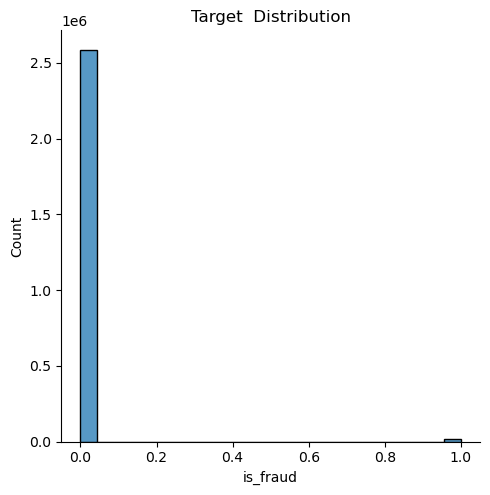

In [15]:
plt.figure(figsize=(10,8));
sns.displot(df['is_fraud']).set(title = 'Target  Distribution', 
                                                   xlabel='is_fraud', 
                                                   ylabel='Count');

## Drop duplicates

In [16]:
df.shape

(2600454, 26)

In [17]:
df.drop_duplicates(inplace=True)

In [19]:
df.shape

(2600454, 26)

### Examine box plots

In [20]:
num_cols = df.select_dtypes([np.int64,np.float64]).columns

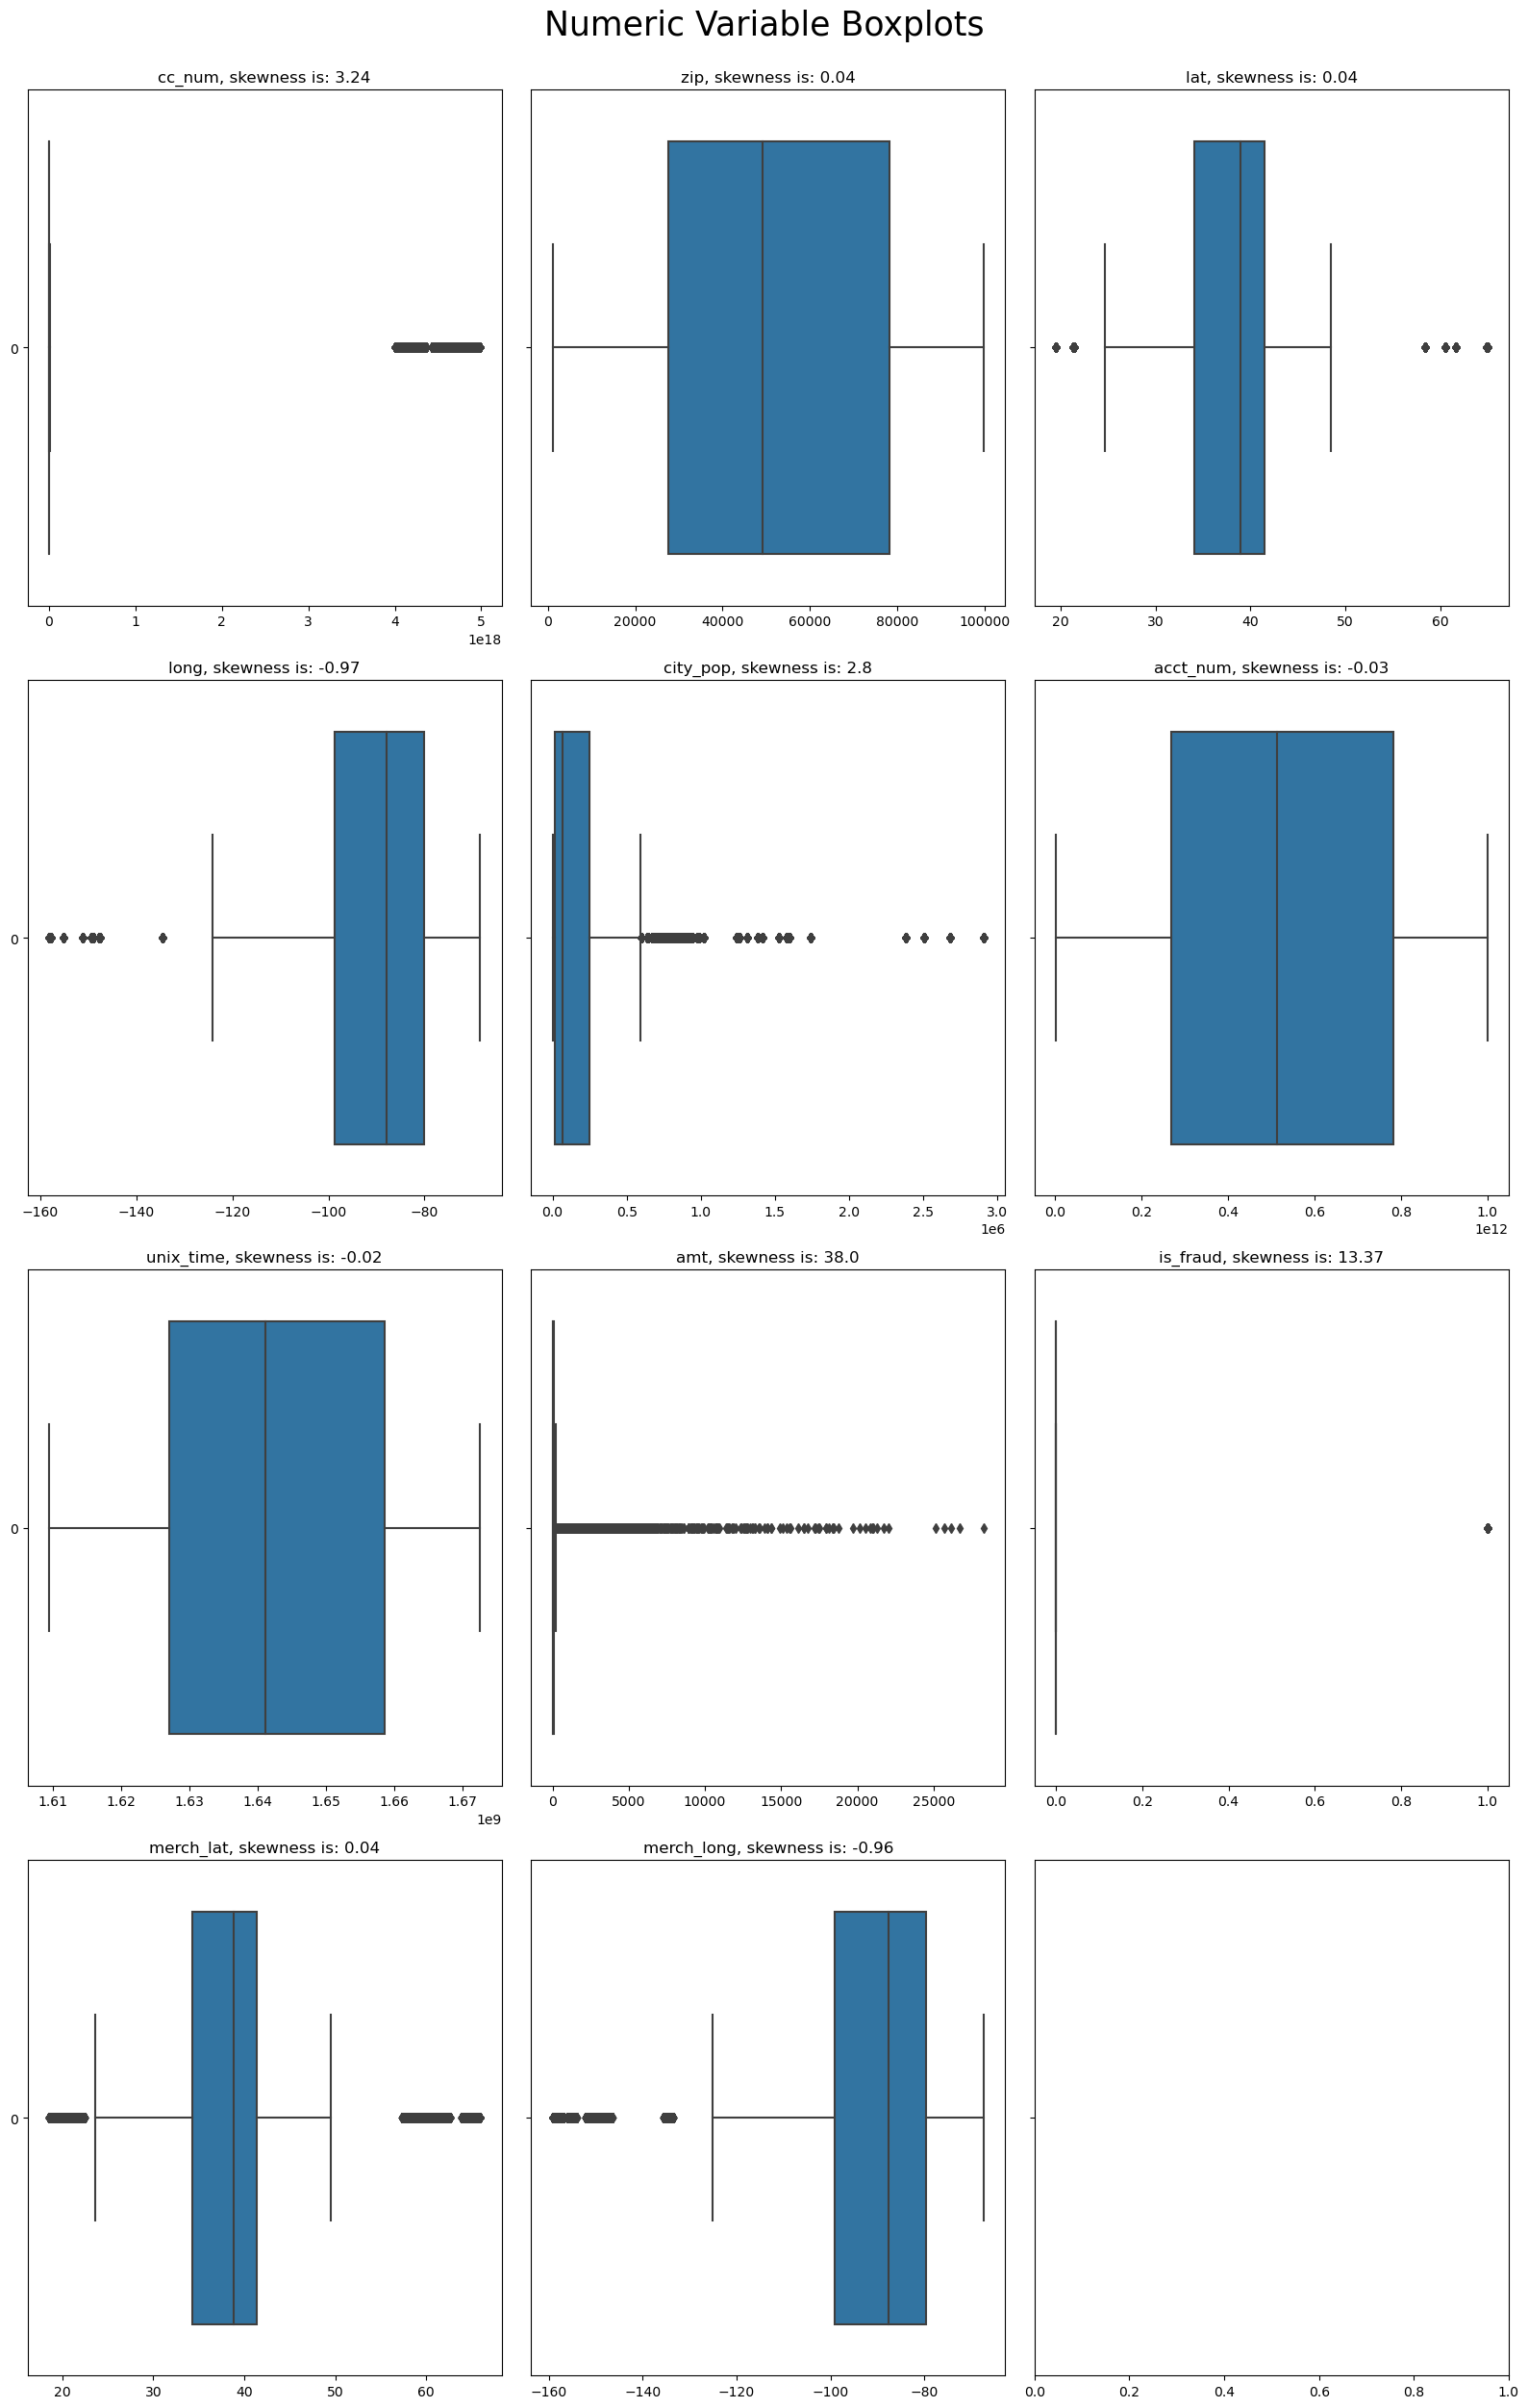

In [21]:
def get_boxplots(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,25))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))
        
get_boxplots(dataset=df, columns_list=num_cols, rows=4, cols=3, suptitle='Numeric Variable Boxplots')
plt.tight_layout()

### Examine correlationss

In [22]:
df.corr()['is_fraud'].sort_values()

unix_time    -0.009710
acct_num     -0.002885
lat          -0.002774
merch_lat    -0.002620
long         -0.000313
merch_long   -0.000311
zip           0.000729
city_pop      0.001152
cc_num        0.002369
amt           0.200836
is_fraud      1.000000
Name: is_fraud, dtype: float64

<AxesSubplot:>

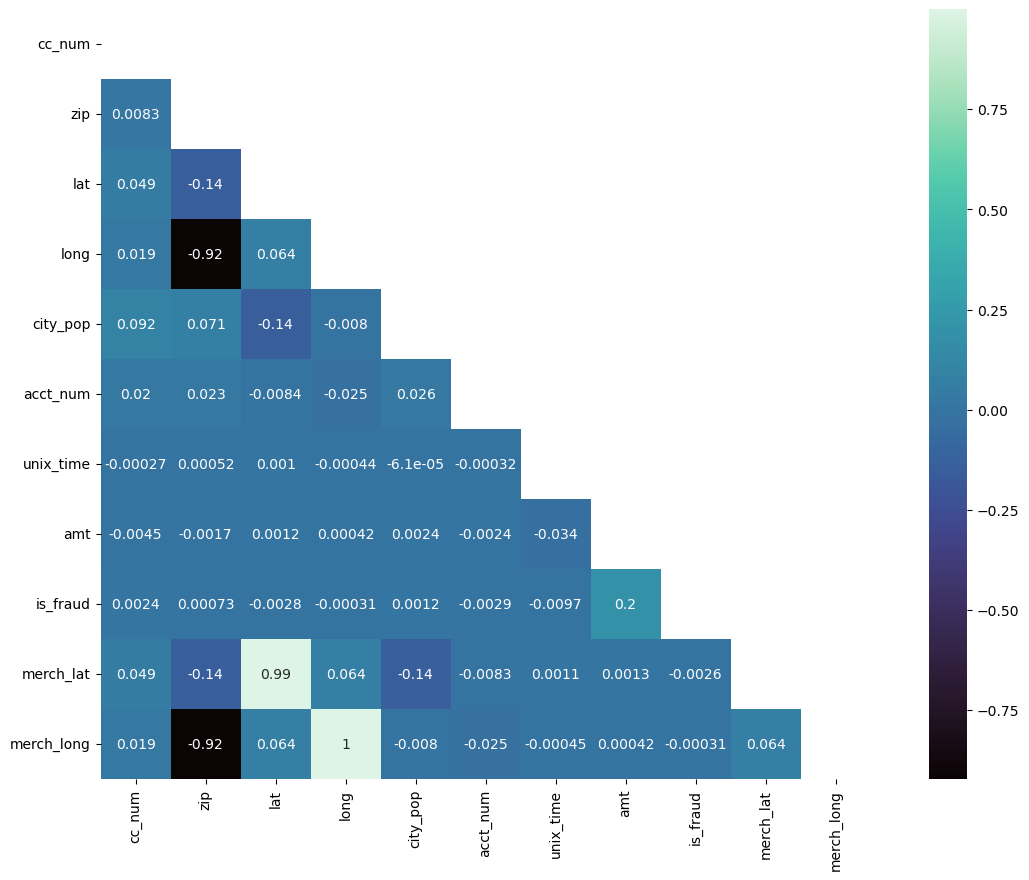

In [23]:
# Establish size of figure.
plt.figure(figsize=(15,10))

# Get correlation of variables.
corr = df.corr()

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
sns.heatmap(corr, mask = mask, 
            square = True, annot = True,
           cmap = 'mako')

### Discuss heat map

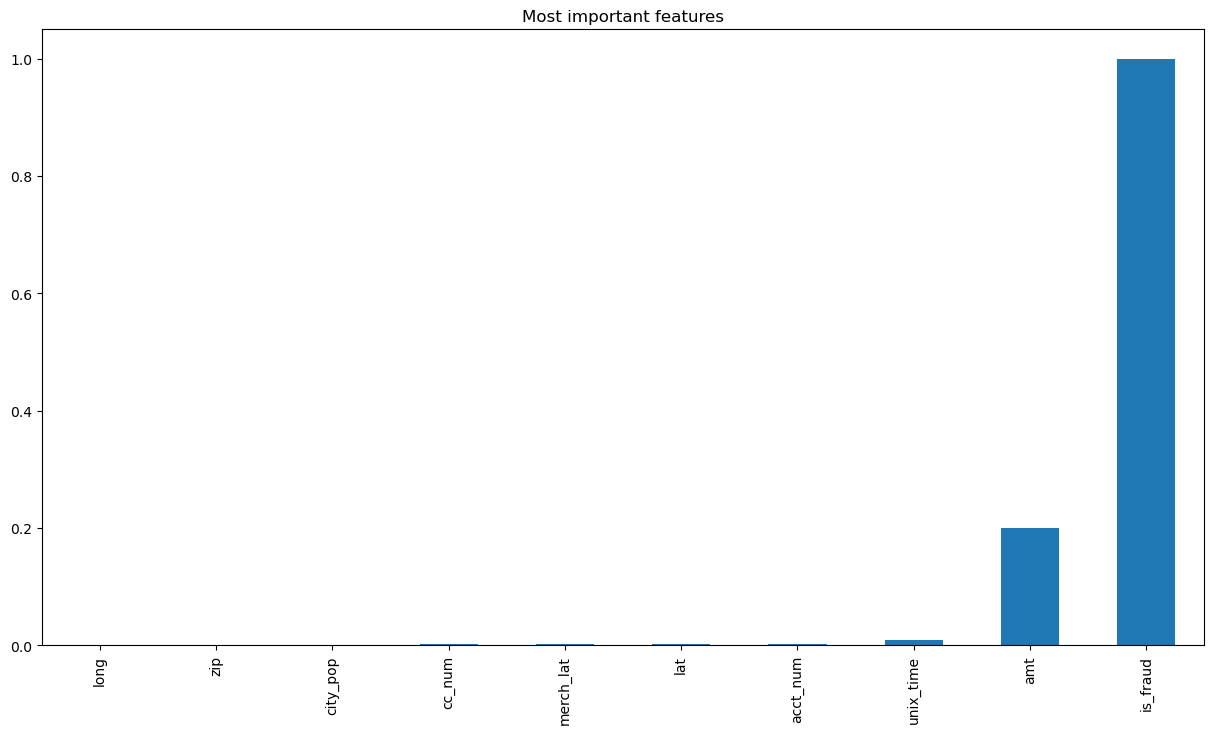

In [24]:
plt.figure(figsize=(15,8))
d = df.corr()['is_fraud'][:-1].abs().sort_values().plot(kind='bar',
                                                              title='Most important features')
plt.show()

### Feature distribution

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def distribution_plots(df, columns):
    n = len(columns)
    if n>11:
        print("Error: Number of columns exceeds limit of 9 columns")
        return
    rows, cols = np.int(np.ceil(n/3)), 3
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(13,8))
    for i, column in enumerate(columns):
        ax = axes.flat[i]
        ax.hist(df[column], bins=60, linewidth=0.5, edgecolor="white")
        ax.set_title(f"{column} distribution")
    plt.tight_layout()
    plt.show()


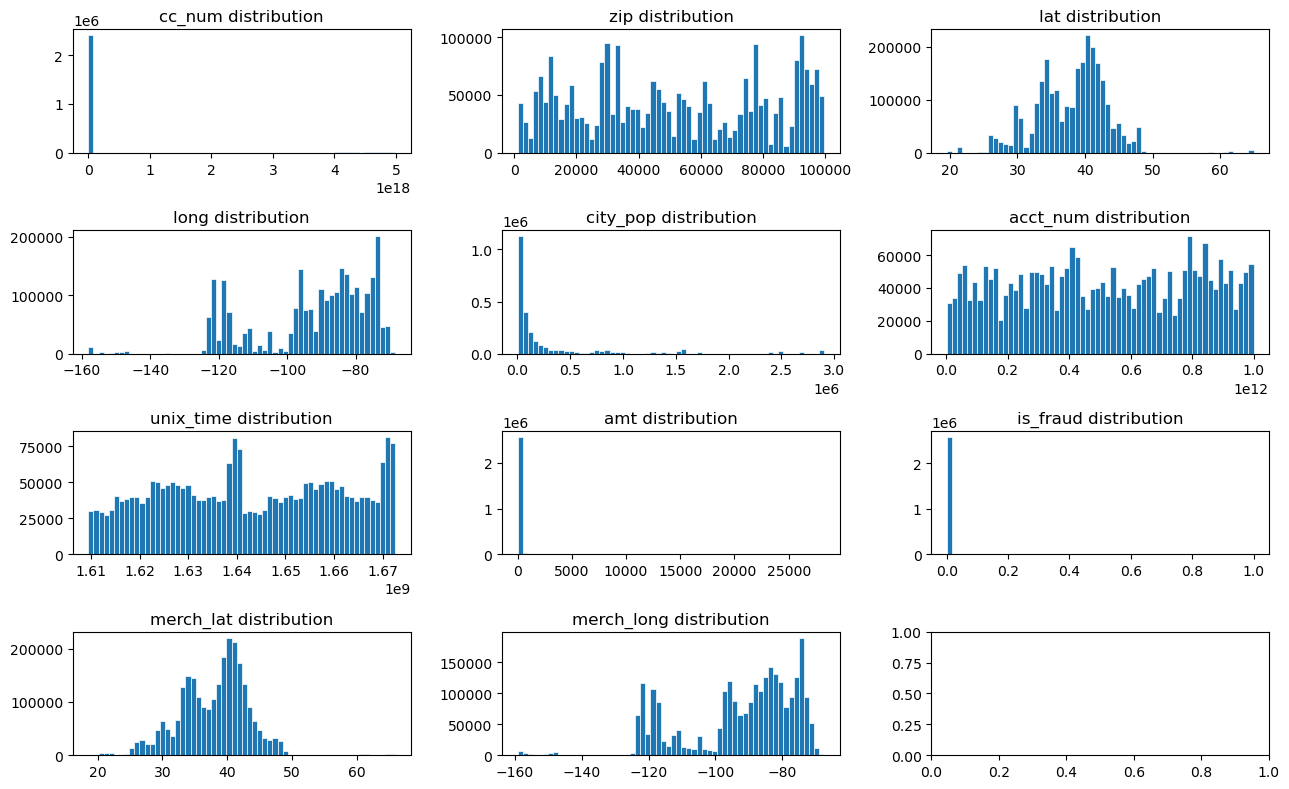

In [27]:
columns = list(df.columns)
distribution_plots(df, num_cols)

### Outlier analysis: TBD

In [28]:
df.columns

Index(['ssn', 'cc_num', 'first', 'last', 'gender', 'street', 'city', 'state',
       'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'acct_num', 'profile',
       'trans_num', 'trans_date', 'trans_time', 'unix_time', 'category', 'amt',
       'is_fraud', 'merchant', 'merch_lat', 'merch_long'],
      dtype='object')

In [31]:
# def find_outliers(df, columns):
#     outliers_count = 0
#     outlier_indices = []
#     for col in columns:
#         q1 = df[col].quantile(0.25)
#         q3 = df[col].quantile(0.75)
#         iqr = q3 - q1
#         lower_bound = q1 - (1.5 * iqr)
#         upper_bound = q3 + (1.5 * iqr)
#         outlier_col = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
#         outlier_indices.extend(outlier_col.index)
#         outliers_count += outlier_col.shape[0]
#     outlier_indices = list(set(outlier_indices))
#     return outliers_count, outlier_indices

# outliers_count, outlier_indices = find_outliers(df, num_cols)
# print(outliers_count)
# outliers_count/df_train.shape[0]

## Examine relationships of different featuers

In [30]:
def count_fraud_values(df, column):
    fraud_df = df[df['is_fraud'] == 1]
    value_counts = fraud_df[column].value_counts()
    return value_counts

In [31]:
count_fraud_values(df, 'gender')

M    7315
F    6991
Name: gender, dtype: int64

In [ ]:
# def fraud_distribution(df, column):
#     """
#     Input dataframe and column of interest. The function returns distribution information 
#     the column of interest.
#     """
#     df_col = df[[column,'trans_num']].groupby([column]).count().reset_index()
#     df_col.columns = [column, column+'_count']

#     #creating the column-fraud distribution
#     df_fraud_col = df[[column, 'trans_num', 'is_fraud']].groupby([column,'is_fraud']).count().reset_index()
#     df_fraud_col.columns = [column, 'is_fraud', 'Transaction count']

#     df_fraud_col = df_fraud_col.merge(df_col[[column, column+'_count']], how='inner', on=column)

#     df_fraud_col['Transaction percentage'] = (df_fraud_col['Transaction count']/df_fraud_col[column+'_count'])*100

#     return df_fraud_col

# df_gender = df_train.groupby('gender')['trans_num'].agg('count').reset_index()
# df_gender.columns = ['gender', 'count']


# df_fraud_gender = df_train.groupby(['gender','is_fraud'])['trans_num'].agg('count').reset_index()
# df_fraud_gender.columns = ['gender', 'is_fraud', 'transaction_count']

# df_fraud_gender = df_fraud_gender.merge(df_gender[['gender', 'count']], how='inner', on='gender')

# df_fraud_gender['transaction_percent'] = (df_fraud_gender['transaction_count']/df_fraud_gender['count'])*100

In [32]:
def fraud_distribution_v3(df, column):
    """
    Input dataframe and column of interest. The function returns distribution information 
    the column of interest.
    """
    df_col = df[[column,'trans_num']].groupby([column]).agg({'trans_num':'count'}).reset_index()
    df_col.columns = [column, column+'_count']

    df_fraud_col = df[[column, 'trans_num',
                       'is_fraud']].groupby([column, 
                                             'is_fraud']).agg({'trans_num':'count'}).reset_index()
    df_fraud_col.columns = [column, 'is_fraud', 'transaction_count']
    df_fraud_col = df_fraud_col.merge(df_col, how='inner', on=column)
    df_fraud_col['transaction_percent'] = round(\
                                        (df_fraud_col['transaction_count']/df_fraud_col[column+'_count'])*100, 2)
    df_fraud_col = df_fraud_col.reindex(columns=[column,'transaction_count', column+'_count', 'transaction_percent', 'is_fraud'])
    return df_fraud_col

In [33]:
fraud_distribution_v3(df, 'gender')

,gender,transaction_count,gender_count,transaction_percent,is_fraud
0,F,1315303,1322294,99.47,0
1,F,6991,1322294,0.53,1
2,M,1270845,1278160,99.43,0
3,M,7315,1278160,0.57,1


We observe approximately the same number of fraud transaction for both genders. Hwoever, the proprtion of males commiting fraud is higher than females.

In [34]:
df.columns

Index(['ssn', 'cc_num', 'first', 'last', 'gender', 'street', 'city', 'state',
       'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'acct_num', 'profile',
       'trans_num', 'trans_date', 'trans_time', 'unix_time', 'category', 'amt',
       'is_fraud', 'merchant', 'merch_lat', 'merch_long'],
      dtype='object')

In [35]:
df_fraud_state = fraud_distribution_v3(df, 'state')
df_fraud_state[df_fraud_state['is_fraud'] == 1].sort_values(by='transaction_percent',
                                                            ascending=False).head(10)

,state,transaction_count,state_count,transaction_percent,is_fraud
101,WY,25,1480,1.69,1
65,NM,78,5900,1.32,1
17,DE,38,5131,0.74,1
97,WI,352,49778,0.71,1
3,AL,198,28582,0.69,1
75,OR,162,23440,0.69,1
39,MA,297,43935,0.68,1
89,UT,173,25611,0.68,1
41,MD,172,25627,0.67,1
91,VA,284,43889,0.65,1


Discussion here based on new data

In [36]:
df_fraud_category = fraud_distribution_v3(df, 'category')
df_fraud_category[df_fraud_category['is_fraud'] == 1].sort_values(by='transaction_percent',
                                                            ascending=False).head(10)

,category,transaction_count,category_count,transaction_percent,is_fraud
23,shopping_net,3299,191216,1.73,1
17,misc_net,1871,118834,1.57,1
9,grocery_pos,3357,243242,1.38,1
25,shopping_pos,1645,257109,0.64,1
5,gas_transport,1158,225837,0.51,1
27,travel,242,82890,0.29,1
19,misc_pos,452,170388,0.27,1
1,entertainment,412,189692,0.22,1
7,grocery_net,231,109691,0.21,1
21,personal_care,355,183951,0.19,1


Discussion here based on new data

In [37]:
df_fraud_merchant = fraud_distribution_v3(df, 'merchant')
df_fraud_merchant[df_fraud_merchant['is_fraud'] == 1].sort_values(by='transaction_percent',
                                                            ascending=False).head(10)

,merchant,transaction_count,merchant_count,transaction_percent,is_fraud
471,"fraud_Hayes, Marquardt and Dibbert",58,2394,2.42,1
387,fraud_Gleason-Macejkovic,87,3867,2.25,1
345,"fraud_Ferry, Lynch and Kautzer",54,2431,2.22,1
543,fraud_Huel-Langworth,51,2357,2.16,1
145,fraud_Boyer-Reichert,82,3849,2.13,1
785,"fraud_Little, Gutmann and Lynch",84,3957,2.12,1
1247,"fraud_Tillman, Fritsch and Schmitt",50,2378,2.10,1
513,fraud_Hills-Witting,83,3999,2.08,1
1121,fraud_Schmitt Ltd,49,2367,2.07,1
73,fraud_Bednar Group,49,2402,2.04,1


Discussion here based on new data

In [38]:
df_fraud_job = fraud_distribution_v3(df, 'job')
df_fraud_job[df_fraud_job['is_fraud'] == 1].sort_values(by='transaction_percent',
                                                            ascending=False).head(10)

,job,transaction_count,job_count,transaction_percent,is_fraud
644,Medical illustrator,12,12,100.0,1
240,Conference centre manager,16,16,100.0,1
852,Radiation protection practitioner,11,11,100.0,1
1031,Technical brewer,12,12,100.0,1
738,Pension scheme manager,8,8,100.0,1
673,Museum/gallery conservator,7,7,100.0,1
1046,Therapeutic radiographer,9,9,100.0,1
741,Personnel officer,12,12,100.0,1
643,Mechanical engineer,8,8,100.0,1
137,"Buyer, retail",10,10,100.0,1


Discussion here based on new data